In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


## The Data

Let's start by reading in the csv file into a pandas dataframe and preview it's content

In [2]:
#Read our dataset into a dataframe.

df = pd.read_csv("loan_approval_dataset.csv")
print('number of columns',len(df))
df.head()

number of columns 4269


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


- Our dataset contains columns with information on Loan applicants.

In [3]:
#Check the number of columns in our dataset.
df.columns.to_list()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

In [4]:
#Preview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


From the above output we can see we had categorical features.

In [5]:
#Number of columns and rows in the data set.
df.shape

(4269, 13)

In [6]:
#To check simple statistics.

df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Overview of categorical features

In [7]:
#check the unique values in the education column
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [8]:
#check the unique values in the loan status column
df[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [9]:
#check the unique values in the self employed column
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)


# Exploratory Data Analysis
Step One: We check any missing data first by creating a simple heatmap in Seaborn.


<Axes: >

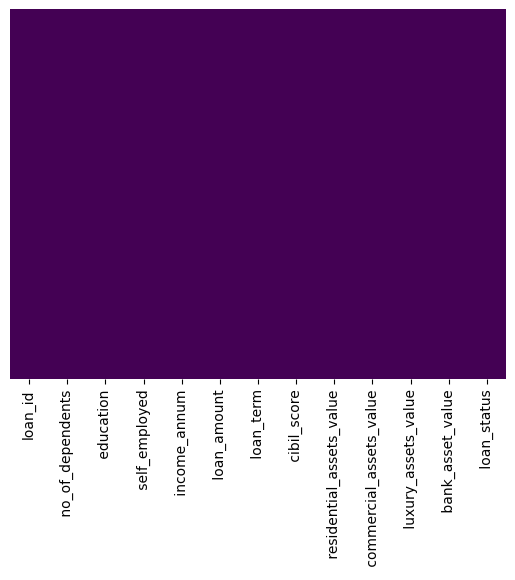

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the heatmap we can conclude that there are no null values in our dataset.

* Step Two: Data Visualisation

C:\Users\Sarah Ngatia\AppData\Local\Temp\ipykernel_17376\2511329156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' loan_status',data=df,palette='rainbow')


<Axes: xlabel=' loan_status', ylabel='count'>

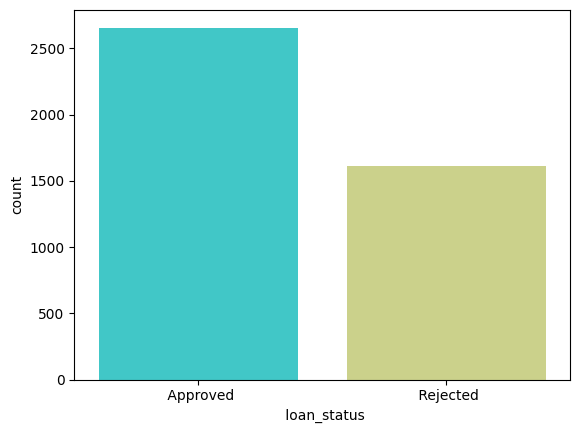

In [11]:
#Countplot to show distribution of approved and rejected loans
sns.countplot(x=' loan_status',data=df,palette='rainbow')

From the countplot, it can be deduced that more loan applications were approved than they were rejected.

That is, 62% Approved and 38% Rejected, as seen in the pie chart below


Text(0.5, 1.0, 'A piechart on loan status')

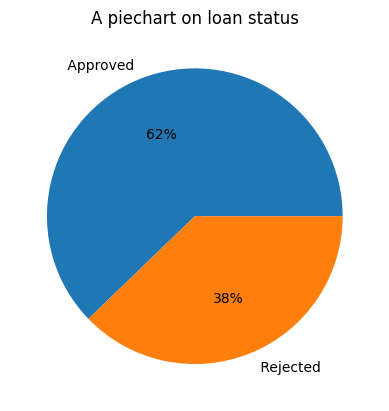

In [12]:
#Piechart to visualise the number loans vs loans rejected
plt.pie(x=df[' loan_status'].value_counts().values,labels=df[' loan_status'].unique(),autopct='%.0f%%')
plt.title('A piechart on loan status')


Counts for each unique self-employed status and loan status:
 self_employed   loan_status
No              Approved        1318
                Rejected         801
Yes             Approved        1338
                Rejected         812
dtype: int64


<Axes: xlabel=' self_employed', ylabel='count'>

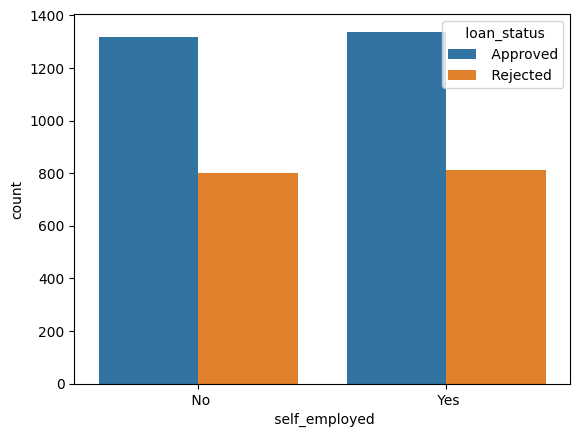

In [13]:
counts = df.groupby([' self_employed', ' loan_status']).size()
print("Counts for each unique self-employed status and loan status:")
print(counts)

sns.countplot(x=' self_employed',hue= ' loan_status',data=df)

From the figure, we can conclude that the status of employment does not have much significance in determining whether the loan will be approved or not, since figures in both rejected and approved are close to same for both groups


Counts for each unique education status and loan status:
 education     loan_status
Graduate      Approved        1339
              Rejected         805
Not Graduate  Approved        1317
              Rejected         808
dtype: int64


<Axes: xlabel=' education', ylabel='count'>

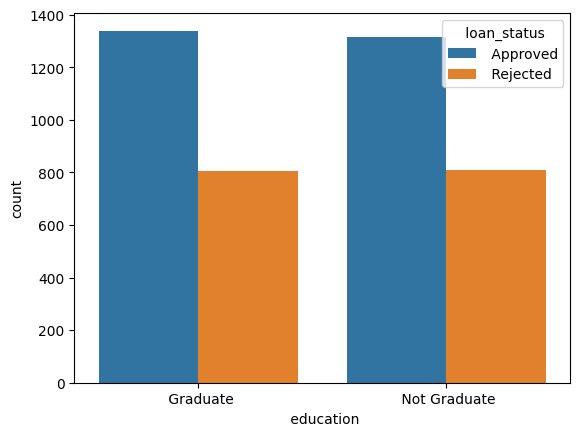

In [14]:
counts = df.groupby([' education', ' loan_status']).size()
print("Counts for each unique education status and loan status:")
print(counts)
sns.countplot(x=' education',hue= ' loan_status',data=df)

From this, we can conclude that education status does not have much significance in determining whether the loan will be approved or not, since figures in both rejected and approved are close to same for both groups


<Axes: >

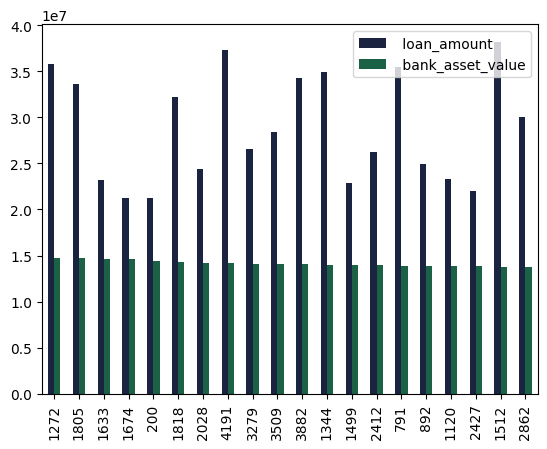

In [15]:
#Bargraph to show correlation of clients with most loan amount, grouped by bank_asset_value
df[[' loan_amount',' bank_asset_value']].nlargest(n=20,columns=' bank_asset_value').plot(kind='bar', color= sns.color_palette('cubehelix'))

There is a significant advantage to those people who had a higher shares /bank assets when it comes to amount of loans one can get from the bank as shown in our bar plot.
The same applies to the residential, commercial and luxury asset values, as we shall see in the heatmaps as below:



Text(0.5, 1.0, 'Correlation Heatmap')

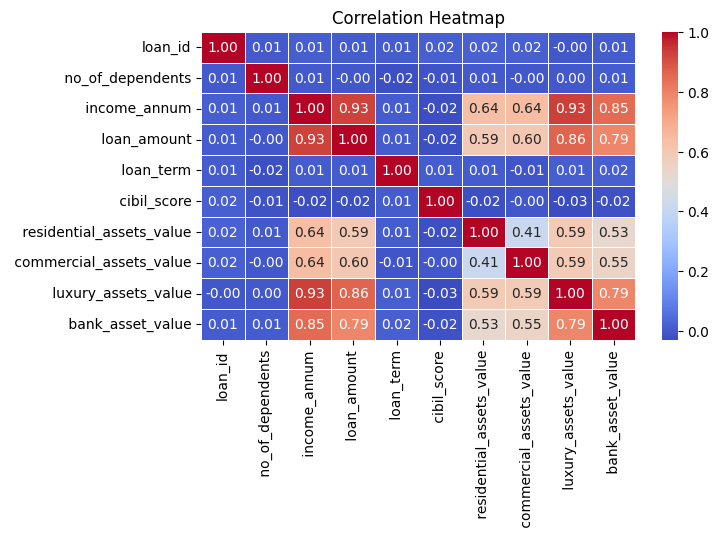

In [16]:
#Correlation heat maps to see relationship between numerical columns
numeric_cols = df.select_dtypes(include=['int64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')


A value close to 1 indicates a perfect positive correlation (eg as income_annum increases, loan_amount also increases).
A value closer to -1 indicate a negative correlation (eg even if you luxury_asset_value and cibil score is low chances loan application will be rejected).
0 indicates no correlation between the features.

C:\Users\Sarah Ngatia\AppData\Local\Temp\ipykernel_17376\1306704596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' loan_amount'],color='darkred',kde=True,bins=30)


<Axes: xlabel=' loan_amount', ylabel='Density'>

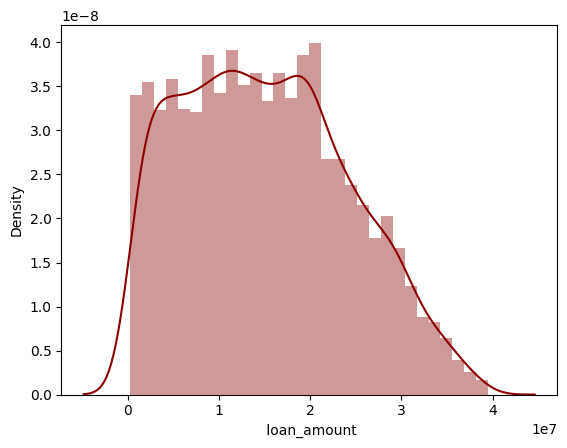

In [17]:
#Distribution of loan_amounts
sns.distplot(df[' loan_amount'],color='darkred',kde=True,bins=30)


The histogram translates as: The loan amount  for the borrowes was ranging from hundreds thousands to 3.9M.


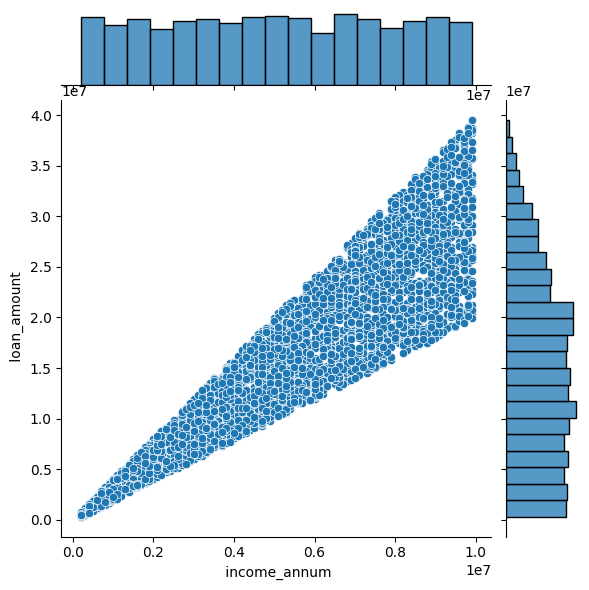

In [18]:
#The jointplot is to investigate the relationship between income and loan amount
sns.jointplot(x=' income_annum',y=' loan_amount',data=df,kind='scatter')

The above jointplot indicates that as income increases so does the loan amount.There is a close relationship between the loan amount and the income. 


C:\Users\Sarah Ngatia\AppData\Local\Temp\ipykernel_17376\3406606178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=' loan_status', y=' loan_term', data=df, palette='pastel')


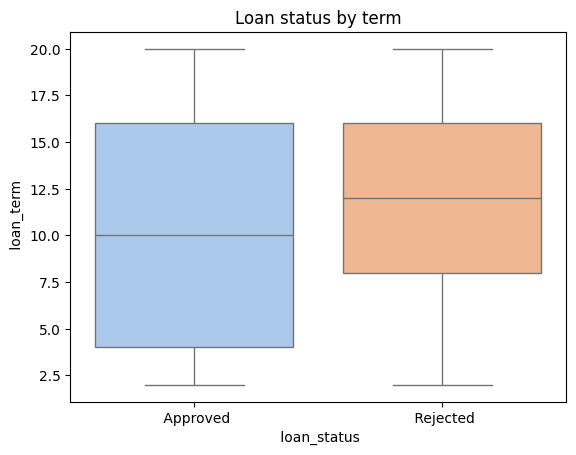

In [19]:
#Boxplot to investigate the relatioship between
sns.boxplot(x=' loan_status', y=' loan_term', data=df, palette='pastel')
plt.title('Loan status by term')
plt.show()

The boxplot shows that there were more loans with shorter terms approved than there were with a longer loan term

C:\Users\Sarah Ngatia\AppData\Local\Temp\ipykernel_17376\2901910565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=' loan_status', y=' cibil_score', data=df, palette='pastel')


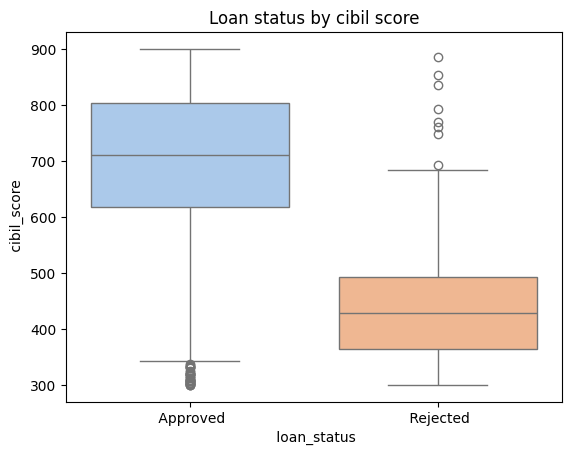

In [20]:
#Boxplot to show relationship between loan status and cibil score
sns.boxplot(x=' loan_status', y=' cibil_score', data=df, palette='pastel')
plt.title('Loan status by cibil score')
plt.show()

With the boxplot, we can conclude that although there are a few outliers, a lower cibil score warrants a rejected loan application and the inverse is true.


# General Overview of distribution Loan amount by loan status using violin plot
 


In [21]:
fig = px.violin(df, x=' loan_status', y=' loan_amount', title='Distribution of Loan Amounts by Loan Status', 
                points='all', box=True, hover_data=df.columns)
fig.update_layout(xaxis_title='Loan Status', yaxis_title='Loan Amount')
fig.show()

The violin plot displays the distribution of the loan application data, providing insights into its probability density. With this, we are able compare the distribution of different numerical variable across different categories in our dataframe.
We can get such insights as min/max approved/declined loan amount, the median and even detailed info on each loan id and where it lies in the box plot distribution.

In [22]:
#Importing necessary libraries
import pandas as pd
import numpy as np

# Task Two: Data Cleaning

In [23]:
#Reading in the csv file into a pandas dataframe.
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [24]:
#Checking columns in dataset
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# Removing whitespaces, checking for nulll values and duplicates

Our column names contain leading whitespaces, so we remove those for data consistency. 

In [25]:
#To remove the leading white spaces in column names
df.columns = df.columns.str.strip()
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [26]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [27]:
#To check if there any whitespaces within the elements in the dataframe
#Example, for the education column
df.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

There exists whitespaces in the dataframe's elements, so we eliminate those too

In [28]:
'''applymap() is used because it applies a function to every single element of the DataFrame.
The lambda function lambda x: x.strip() if isinstance(x, str) else x checks if the element is a string and applies strip() to remove whitespaces,
 else, x remains unchanged'''

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\Sarah Ngatia\AppData\Local\Temp\ipykernel_17376\1064635692.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [29]:
df.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [30]:
#check for null values.
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

There are no null values in our dataset.

In [31]:
#check for any duplicates
df.duplicated().sum()

0

There no duplicates in our dataset

# Converting categorical values into Numerical values

In [32]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


Here, we assign numerical values to columns with categorical values(ie 'education','self_employed','loan_status') so that we can have variables into a format that the model can interpret, when we want to use the specific columns as predictors in our regression model

In [33]:
education={'Graduate':1,'Not Graduate':0}
df['education']=df['education'].apply(lambda x:education[x])
self_employed={'Yes':1,'No':0}
df['self_employed']=df['self_employed'].apply(lambda x:self_employed[x])
loan_status={'Approved':1,'Rejected':0}
df['loan_status']=df['loan_status'].apply(lambda x:loan_status[x])
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


# Drop columns

Here we drop columns that we will not particularly need in our regression model, and in this case we drop the 'loan_id' column since it serves same purpose as index

In [34]:
df.drop('loan_id',axis=1,inplace=True)

# Task 3
Building our Logistic Regression Model

In [35]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression


In [36]:
#Definition of the independent and dependent variables
X=df.drop('loan_status', axis=1)
y=df['loan_status']

In [37]:
#Splitting our dataset into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=140)

In [38]:
#Standardization of dataset
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Standardizing these features (i.e., scaling them to have zero mean and unit variance) ensures that each feature contributes equally to the model's predictions and avoids bias towards features with larger scales.

In [39]:
#Listing values of scaled X_train
X_train_scaled

array([[ 0.87503556, -1.00941514, -1.01415642, ..., -0.28833485,
        -0.79094513, -0.25578491],
       [-0.88524693, -1.00941514,  0.98604119, ...,  0.87477423,
        -0.17698132,  0.1753883 ],
       [-0.2984861 , -1.00941514,  0.98604119, ...,  0.00814393,
        -0.49492687, -0.31738109],
       ...,
       [ 1.46179639, -1.00941514, -1.01415642, ...,  0.46426514,
         1.85129199,  1.37651369],
       [-0.88524693,  0.99067268,  0.98604119, ..., -0.58481364,
        -0.86769061, -0.40977535],
       [ 0.87503556, -1.00941514, -1.01415642, ..., -1.04093485,
        -1.44876351, -1.14892943]])

In [40]:
#Initializing and training the Logistic Regression model
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled,y_train)

LogisticRegression()

In [41]:
#Predicting the dependent variables on X_test 
predictions = logmodel.predict(X_test_scaled)

Here, we predict the target variable for the scaled test dataset (X_test_scaled),  using the trained logistic regression model (logmodel) which takes the features of the scaled test data (X_test_scaled) as input and returns the predicted labels based on the learned model.

# Tak 4: Model Evaluation

In [42]:
#Import classification library
from sklearn.metrics import classification_report

In [43]:
#Classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       468
           1       0.95      0.94      0.94       813

    accuracy                           0.93      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg       0.93      0.93      0.93      1281



This is our prediction model with a 93% accuracy score

Precision Score: For rejected loan_status our model predicted correctly 89% of the time and for approved loans, 95% of the times,it was correct. 

Recall: For rejected loan_status instances, 91% instances were correctly identified, while only 94% of approved loans_instances were correctly identified.

F1-score: For rejected loan_status, the F1-score is 0.90, and for approved lons it is 0.94.

In [44]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[426  42]
 [ 52 761]]


In our confusion matrix, the diagonal of the confusion matrix represents the correct predictions, while off-diagonal elements represent incorrect predictions. 
In our case:

426 instances were correctly classified as "Rejected".(True negatives).

42 instances were incorrectly classified as "Approved" when they were actually "Rejected"(False Positive)

52 instances were incorrectly classified as "Rejected" when they were actually "Approved".(False Negative)

761 instances were correctly classified as "Approved".(True Postive)

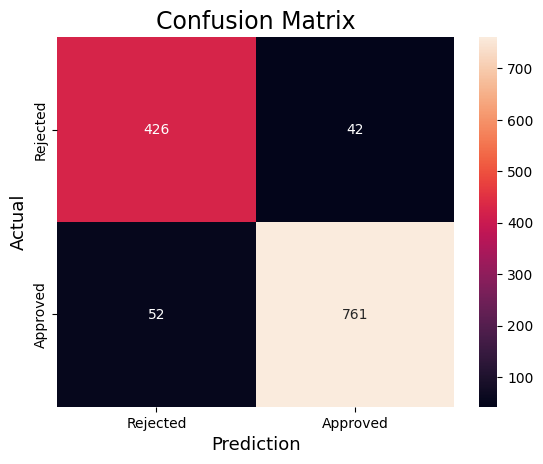

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, 
            annot=True  ,
            fmt='g', 
            xticklabels=['Rejected','Approved'],
            yticklabels=['Rejected','Approved'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

We can graghically represent the confusion matrix in a heatmap as such.
Cells with higher counts (lighter colors) indicate correct predictions.
Cells with lower counts (darker colors) indicate incorrect predictions.


Overall, the confusion matrix suggests that the model is performing reasonably well, with a higher number of correct predictions compared to incorrect ones.


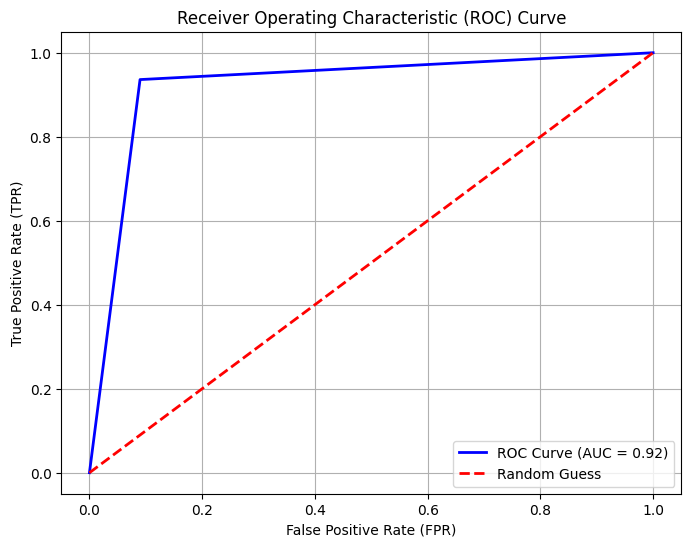

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
#compute the false positive rate(FPR) and true positives rate(TPR)


fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculate AUC score
auc = roc_auc_score(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red',lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


AUC of 0.92 indicates the model has a high true positive rate and a low false positive rate across various threshold settings.

The ROC curve essentially, provides a visual representation of the model's ability to discriminate between positive and negative classes across different threshold settings. Our higher AUC value indicates better classification performance, indicating a highly reliable classification model that effectively separates positive and negative cases

# Task 5: Model Interpretability

In [47]:
# Getting the coefficients
coefficients = logmodel.coef_.flatten()

# Calculate coefficient magnitudes
coefficient_magnitudes = np.abs(coefficients)

# Print coefficient magnitudes
print(coefficient_magnitudes)

[0.01147266 0.07837035 0.00409622 1.77618107 1.23836085 0.77205346
 4.00521282 0.0965062  0.15748569 0.29180886 0.23592655]


The provided coefficients magnitudes in our logistic regression model represent the absolute strength of how each feature influences the log-odds of the target variable, ie loan_status. By comparing the magnitudes, we can see which features have a stronger influence on the model's predictions. For instance, the tenth feature (4.00521282), which directly translates to the column 'cibil_score' has the largest magnitude, indicating it has the strongest impact on the log-odds(rejected or approved) compared to other features

The smaller magnitude columns suggests a weaker influence on the log-odds.

# 

In [48]:
# Get the coefficients
coefficients =logmodel.coef_.flatten()

# Exponentiate the coefficients to get the odds ratios
odds_ratios = np.exp(coefficients)

# Display the odds ratios
print("Odds Ratios:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {odds_ratios[i]}")


Odds Ratios:
no_of_dependents: 0.9885928988150301
education: 1.0815231279886004
self_employed: 1.0041046240872082
income_annum: 0.16928339612910534
loan_amount: 3.4499538282269375
loan_term: 0.46206326643480733
cibil_score: 54.88350325860494
residential_assets_value: 1.1013164130642514
commercial_assets_value: 1.1705640091785585
luxury_assets_value: 1.338847089097932
bank_asset_value: 1.2660813190152331


With the odds ratio, we aim to compare the relative chance of events between groups. The interpretation considers the direction and magnitude of the OR. An OR greater than 1 suggests a positive association, while an OR less than 1 suggests a negative association.
In this case, we can interprete our findings as follows:

* no_of_dependents (0.988): A one-unit increase in the number of dependents leads to a slight decrease in the odds of loan approval by a factor of 0.988. This effect is very close to 1, suggesting a minimal impact.

* education (1.082): A one-unit increase in education level (measured categorically) leads to a slight increase in the odds of loan approval by a factor of 1.082. Again, the effect is close to 1, indicating a weak positive association.

* self_employed (1.004): Being self-employed (compared to being salaried) has a near-neutral effect on the odds of approval (OR very close to 1).

* income_annum (0.169): A one-unit increase in annual income leads to a significant decrease in the odds of loan approval by a factor of 0.169. This suggests higher income might be associated with a lower likelihood of needing a loan or not meeting other criteria.

* loan_amount (3.450): A one-unit increase in the loan amount leads to a significant increase in the odds of approval by a factor of 3.450. This is likely because larger loan amounts might require stricter approval criteria.

* loan_term (0.462): A one-unit increase in the loan term (likely measured in years) leads to a significant decrease in the odds of approval by a factor of 0.462. This suggests shorter loan terms might be viewed more favorably.

* cibil_score (54.884): A one-unit increase in the credit score leads to a very significant increase in the odds of loan approval by a factor of 54.884. This indicates a strong positive association between creditworthiness and loan approval.

* residential_assets_value (1.101): A one-unit increase in the residential asset value leads to a slight increase in the odds of approval by a factor of 1.101. This suggests owning a home might be a positive factor, but the effect is weak.

* commercial_assets_value (1.171): A one-unit increase in the commercial asset value leads to a slight increase in the odds of approval by a factor of 1.171. This effect is slightly stronger than residential assets but still relatively weak.

* luxury_assets_value (1.339): A one-unit increase in the luxury asset value leads to a moderate increase in the odds of approval by a factor of 1.339. This suggests owning luxury assets might be a somewhat positive factor.

# Conclusion

This logistic regression model aimed to predict loan approval decisions. The model achieved an accuracy of 0.93, indicating a strong ability to discriminate between loan applicants who will be approved or rejected.

Key Findings:

* The analysis revealed that the 'cibil_score' was the most influential factor in the model;Applicants with higher cibil_scores were more likely to be approved for loans. 

* Conversely, we also noted, applicants with higher income_annum displayed lower chances of approval.

* Odds ratio analysis further highlighted other neutral factors such as, number of dependents, employment and education status